In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Pride.txt to Pride.txt


In [4]:
file = open("Pride.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook, Pride and Prejudice, by Jane Austen, Edited by R. W. (Robert William) Chapman This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org Title: Pride and Prejudice Author: Jane Austen Editor: R. W. (Robert William) Chapman Release Date: May 9, 2013 [eBook #42671] Language: English '

In [5]:

len(data)

704792

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 178, 157, 1173, 290, 4, 877, 30, 73, 3195, 4176, 30, 3196, 2163, 3197]

In [7]:
len(sequence_data)

126018

In [8]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

6736


In [9]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  126015


array([[   1,  178,  157, 1173],
       [ 178,  157, 1173,  290],
       [ 157, 1173,  290,    4],
       [1173,  290,    4,  877],
       [ 290,    4,  877,   30],
       [   4,  877,   30,   73],
       [ 877,   30,   73, 3195],
       [  30,   73, 3195, 4176],
       [  73, 3195, 4176,   30],
       [3195, 4176,   30, 3196]])

In [10]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [11]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[   1  178  157]
 [ 178  157 1173]
 [ 157 1173  290]
 [1173  290    4]
 [ 290    4  877]
 [   4  877   30]
 [ 877   30   73]
 [  30   73 3195]
 [  73 3195 4176]
 [3195 4176   30]]
Response:  [1173  290    4  877   30   73 3195 4176   30 3196]


In [12]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             67360     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 6736)              6742736   
                                                                 
Total params: 19,859,096
Trainable params: 19,859,096
Non-trainable params: 0
_________________________________________________________________


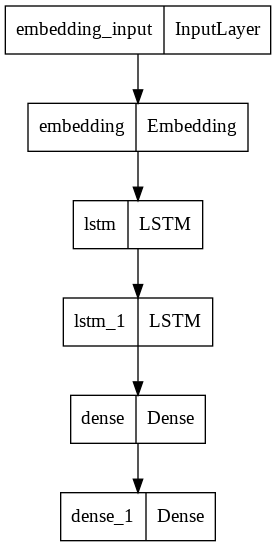

In [15]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
1967/1969 [============================>.] - ETA: 0s - loss: 6.2320
Epoch 1: loss improved from inf to 6.23148, saving model to next_words.h5
1969/1969 [==============================] - 38s 15ms/step - loss: 6.2315
Epoch 2/70
1966/1969 [============================>.] - ETA: 0s - loss: 5.6028
Epoch 2: loss improved from 6.23148 to 5.60221, saving model to next_words.h5
1969/1969 [==============================] - 30s 15ms/step - loss: 5.6022
Epoch 3/70
1969/1969 [==============================] - ETA: 0s - loss: 5.2419
Epoch 3: loss improved from 5.60221 to 5.24193, saving model to next_words.h5
1969/1969 [==============================] - 30s 15ms/step - loss: 5.2419
Epoch 4/70
1968/1969 [============================>.] - ETA: 0s - loss: 5.0018
Epoch 4: loss improved from 5.24193 to 5.00168, saving model to next_words.h5
1969/1969 [==============================] - 30s 15ms/step - loss: 5.0017
Epoch 5/70
1966/1969 [============================>.] - ETA: 0s - loss: 4.7911
E

In [17]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [19]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: it may all come to nothing 
['to', 'nothing', '']
Error occurred:  in user code:

    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibilit

KeyboardInterrupt: ignored